In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
gold = pd.read_csv('Gold_Price.csv')

In [3]:
gold_price = gold[['Date','Close']]

In [4]:
gold_price

,Date,Close
0,2013-01-02,1687.900024
1,2013-01-03,1673.699951
2,2013-01-04,1648.099976
3,2013-01-07,1645.500000
4,2013-01-08,1661.500000
...,...,...
2668,2023-08-14,1910.599976
2669,2023-08-15,1902.500000
2670,2023-08-16,1896.099976
2671,2023-08-17,1884.099976


In [5]:
gold_price['Date'] = pd.to_datetime(gold_price['Date'])

In [6]:
gold_price.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

<Axes: >

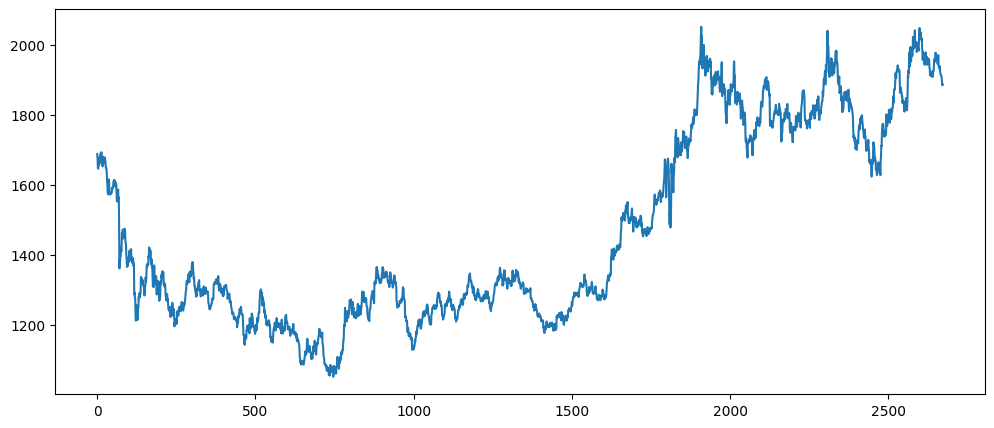

In [8]:
gold_price['Close'].plot(figsize=(12,5))

In [9]:
gold_train=gold_price.head(1870)

In [10]:
gold_test = gold_price.tail(803)

In [27]:
gold_test

,Date,Close
1870,2020-06-11,1732.000000
1871,2020-06-12,1729.300049
1872,2020-06-15,1720.300049
1873,2020-06-16,1729.599976
1874,2020-06-17,1729.199951
...,...,...
2668,2023-08-14,1910.599976
2669,2023-08-15,1902.500000
2670,2023-08-16,1896.099976
2671,2023-08-17,1884.099976


In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [12]:
model = ExponentialSmoothing(gold_train['Close'],trend=None ,seasonal='additive', seasonal_periods=365)
model_fit = model.fit()

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [13]:
start = len(gold_train)
end = len(gold_train) + len(gold_test) - 1
pred = model_fit.predict(start=start, end=end).rename('Exponential')

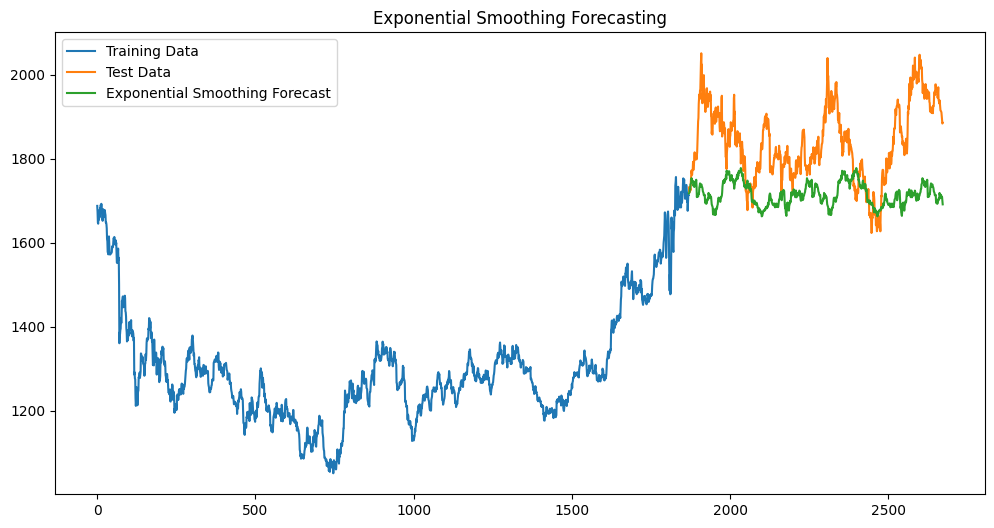

In [14]:
plt.figure(figsize=(12, 6))
gold_train['Close'].plot(legend=True, label='Training Data')
gold_test['Close'].plot(legend=True, label='Test Data')
pred.plot(legend=True, label='Exponential Smoothing Forecast')
plt.legend()
plt.title('Exponential Smoothing Forecasting')
plt.show()

In [15]:
model_final = ExponentialSmoothing(gold_price['Close'], trend=None, seasonal='additive', seasonal_periods=365)
model_fit_final = model_final.fit()

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [17]:
last_date = gold_price.index[-1]
if isinstance(last_date, pd.Timestamp):
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq="D")
    future_predictions = model_fit_final.forecast(len(future_dates))
else:
    print("The last date is not a valid timestamp or datetime object.")

The last date is not a valid timestamp or datetime object.


In [18]:
last_date = gold_price['Date'].iloc[-1]  


if isinstance(last_date, pd.Timestamp):
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq="D")
    
else:
    print("The last date is not a valid timestamp or datetime object.")

In [19]:
future_dates

DatetimeIndex(['2023-08-19', '2023-08-20', '2023-08-21', '2023-08-22',
               '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-26',
               '2023-08-27', '2023-08-28', '2023-08-29', '2023-08-30',
               '2023-08-31', '2023-09-01', '2023-09-02', '2023-09-03',
               '2023-09-04', '2023-09-05', '2023-09-06', '2023-09-07',
               '2023-09-08', '2023-09-09', '2023-09-10', '2023-09-11',
               '2023-09-12', '2023-09-13', '2023-09-14', '2023-09-15',
               '2023-09-16', '2023-09-17'],
              dtype='datetime64[ns]', freq='D')

In [20]:
future_close=model_fit_final.forecast(len(future_dates))

In [21]:
forecast_30days = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_close
})

In [22]:
forecast_30days

,Date,Predicted_Price
2673,2023-08-19,1891.842806
2674,2023-08-20,1881.147525
2675,2023-08-21,1883.439033
2676,2023-08-22,1873.664215
2677,2023-08-23,1867.738932
2678,2023-08-24,1871.485666
2679,2023-08-25,1871.433016
2680,2023-08-26,1874.384265
2681,2023-08-27,1873.784845
2682,2023-08-28,1862.650435


<Axes: >

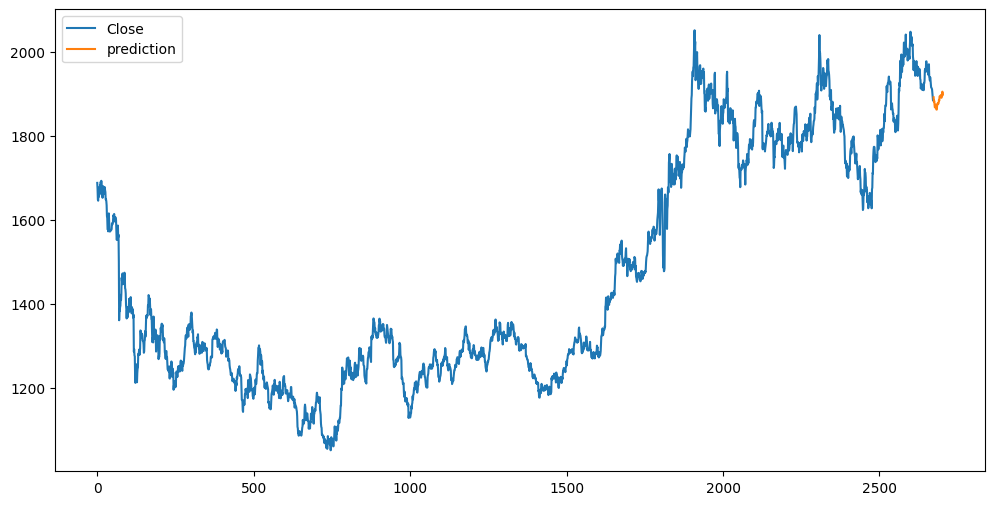

In [23]:
plt.figure(figsize=(12, 6))
gold_price['Close'].plot(legend=True, label='Close')
future_close.plot(legend=True, label='prediction')